<a href="https://colab.research.google.com/github/zzhining/data_visualization/blob/main/bike_sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand

- 시간 - 시간별 + 타임 스탬프
- 계절 - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- 방학 - whether the day is considered a holiday
- 주간 - whether the day is neither a weekend nor holiday
- 날씨 -
    - 1: 맑음, Few clouds, Partly cloudy, Partly cloudy
    - 2: 안개낌 + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: 약간 눈내림, 약간 비 + 천둥번개 + Scattered 구름, 약간의 비 + Scattered 구름
    - 4: 소나기 + 우박 + 천둥번개 + 안개, 눈 + 짙은 안개
- 온도 - temperature in Celsius
- 체감온도 - "feels like" temperature in Celsius
- 습도 - relative humidity
- 풍량 - wind speed
- 미가입 - number of non-registered user rentals initiated
- 가입 - number of registered user rentals initiated
- 렌탈수 - number of total rentals (Dependent Variable)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./dataset/bike_sharing_demand_train.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 1) 각 컬럼의 데이터 분포 확인

In [ ]:
print('season: {}'.format(data['season'].unique()))
print('holiday: {}'.format(data['holiday'].unique()))
print('workingday: {}'.format(data['workingday'].unique()))
print('weather: {}'.format(data['weather'].unique()))

season: [1 2 3 4]
holiday: [0 1]
workingday: [0 1]
weather: [1 2 3 4]


In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

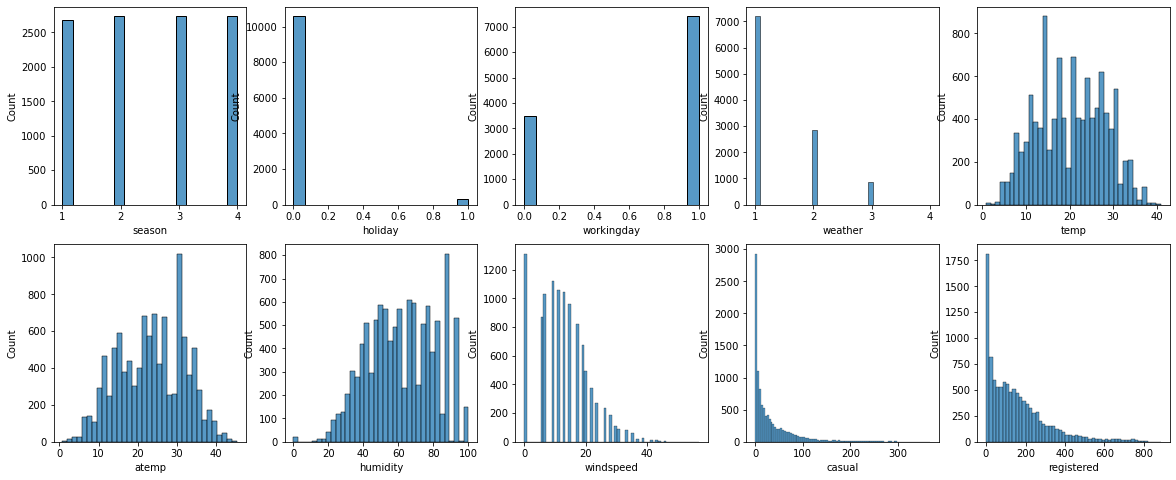

In [ ]:
nrows, ncols = 2, 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,8)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j + 1
        sns.histplot(x=data.columns[attr], data=data, ax=axs[i][j])

## 2) 연도별, 월별, 일별, 시간별 대여량

In [ ]:
# data.dtypes
data['datetime'] = data['datetime'].astype('datetime64')
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second
data["dayofweek"] = data["datetime"].dt.dayofweek #요일

data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


<AxesSubplot:xlabel='second', ylabel='count'>

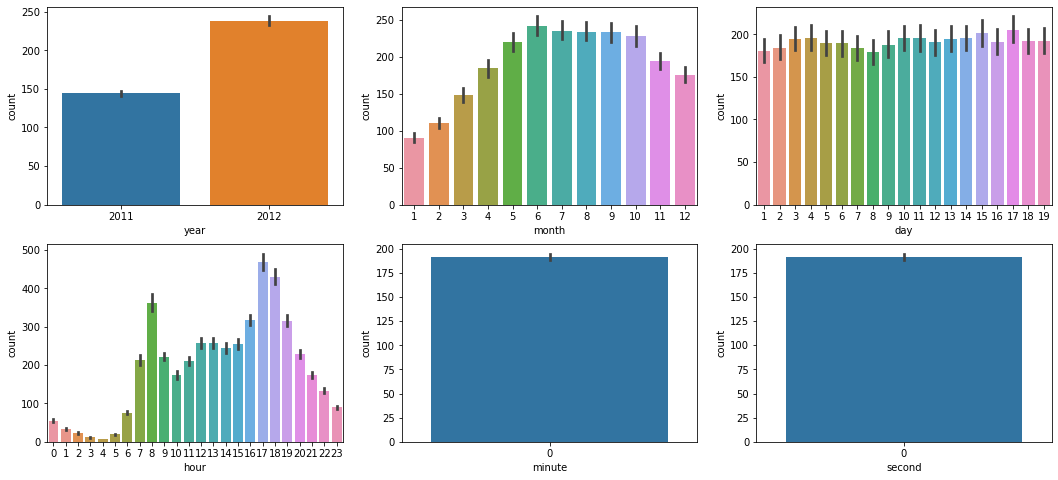

In [ ]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=data, x="year", y="count", ax=ax1)
sns.barplot(data=data, x="month", y="count", ax=ax2)
sns.barplot(data=data, x="day", y="count", ax=ax3)
sns.barplot(data=data, x="hour", y="count", ax=ax4)
sns.barplot(data=data, x="minute", y="count", ax=ax5)
sns.barplot(data=data, x="second", y="count", ax=ax6)

- 연도별 대여량은 2011년 보다 2012년이 더 많다.
- 6 ~ 10월에 대여량이 많고, 1~2월에 적다.(겨울보다는 여름에 대여량이 많다.)
- 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안 된다.
- 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.
- 분, 초도 다 0이기 때문에 의미가 없다.

<AxesSubplot:xlabel='year_month', ylabel='count'>

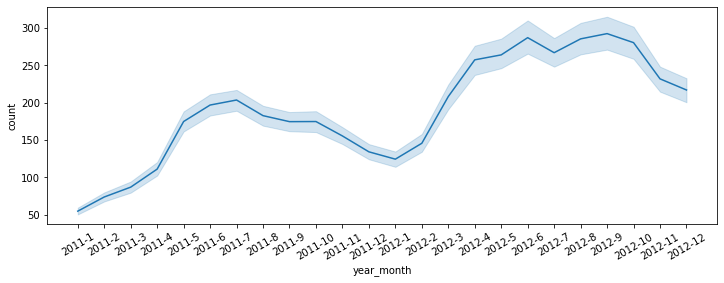

In [ ]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
data["year_month"] = data["datetime"].apply(concatenate_year_month)

plt.subplots(figsize=(12, 4))
plt.xticks(rotation = 30)
sns.lineplot(data=data, x="year_month", y="count")

<AxesSubplot:xlabel='month', ylabel='count'>

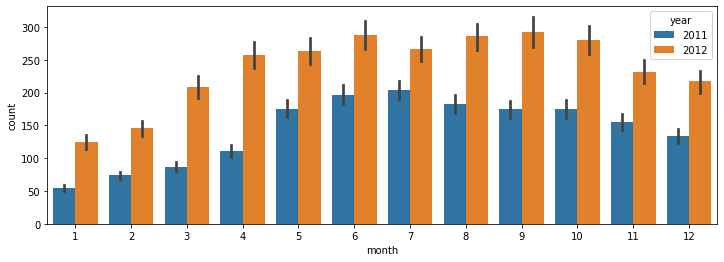

In [ ]:
plt.subplots(figsize=(12, 4))
sns.barplot(data = data, x = 'month', y = 'count', hue='year')

- 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다

## 3) 휴무일, 요일별 상관관계

<AxesSubplot:xlabel='hour', ylabel='count'>

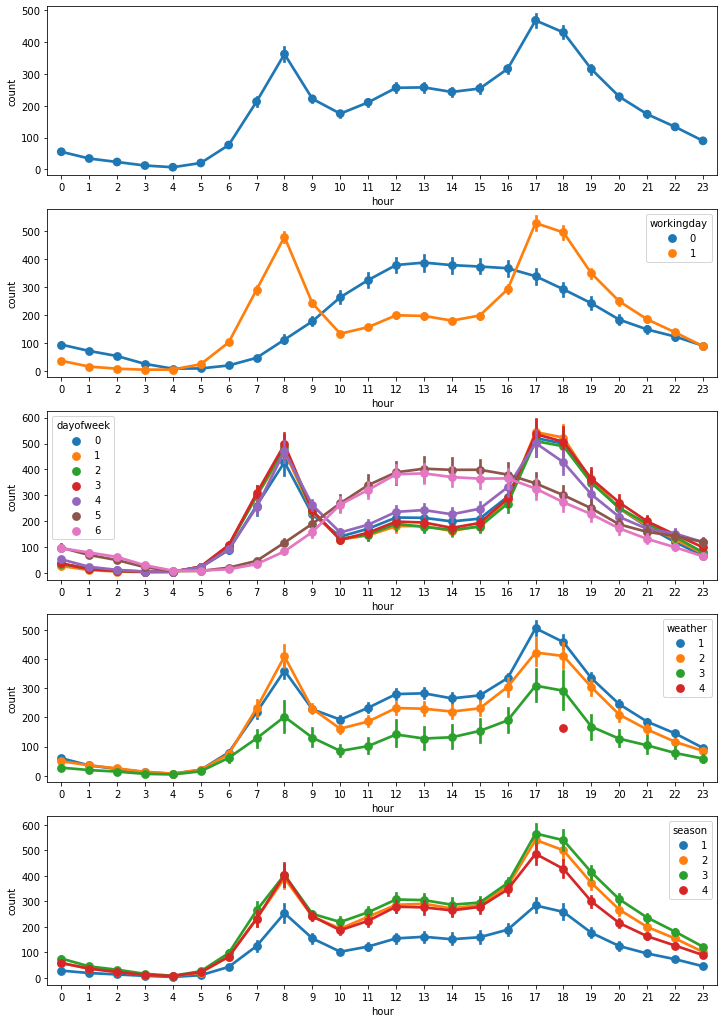

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(12,18)

sns.pointplot(data=data, x="hour", y="count", ax=ax1)
sns.pointplot(data=data, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=data, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=data, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=data, x="hour", y="count", hue="season", ax=ax5)

## 4) 온도, 습도, 바람 세기와 대여량 간의 상관관계 

<AxesSubplot:xlabel='windspeed', ylabel='count'>

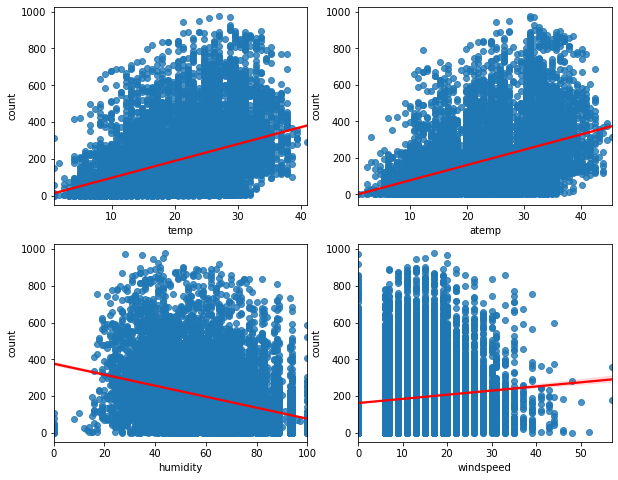

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(10, 8))#, sharex=True)
sns.regplot(x='temp', y = 'count', data=data, line_kws={'color': 'red'}, ax=ax[0][0])
sns.regplot(x='atemp', y = 'count', data=data, line_kws={'color': 'red'}, ax=ax[0][1])
sns.regplot(x='humidity', y = 'count', data=data, line_kws={'color': 'red'}, ax=ax[1][0])
sns.regplot(x='windspeed', y = 'count', data=data, line_kws={'color': 'red'}, ax=ax[1][1])

## 5) 계절별 대여량

<AxesSubplot:xlabel='season', ylabel='count'>

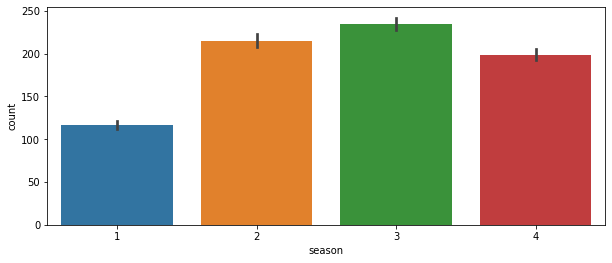

In [ ]:
plt.subplots(figsize=(10, 4))
sns.barplot(x = 'season', y='count', data=data)

<AxesSubplot:xlabel='season', ylabel='month'>

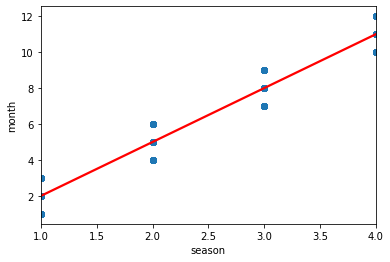

In [ ]:
sns.regplot(x='season', y = 'month', data=data, line_kws={'color': 'red'})

<AxesSubplot:xlabel='month', ylabel='temp'>

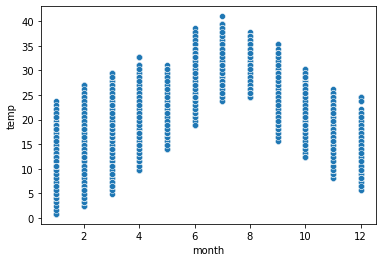

In [ ]:
sns.scatterplot(x='month', y = 'temp', data=data)

.